In [2]:
import numpy as np
import matplotlib.pyplot as plt

file_x_test = np.load('/content/x_test.npy')
file_y_test = np.load('/content/y_test.npy')
file_x_train = np.load('/content/x_train.npy')
file_y_train = np.load('/content/y_train.npy')

FileNotFoundError: [Errno 2] No such file or directory: '/content/x_test.npy'

In [ ]:
print(file_x_test.shape)
print(file_x_train.shape)
print(file_y_test.shape)
print(file_y_train.shape)

(100, 1)
(100, 1)
(100, 1)
(100,)


In [ ]:
file_y_train = file_y_train.reshape(100,1)
file_y_train.shape

(100, 1)

<function matplotlib.pyplot.show(*args, **kw)>

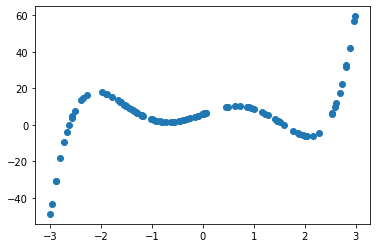

In [ ]:
plt.scatter(file_x_train,file_y_train)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

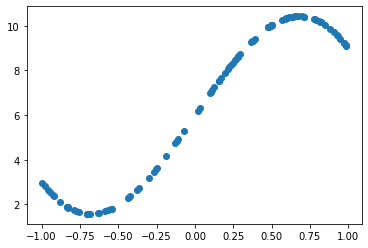

In [ ]:
plt.scatter(file_x_test,file_y_test)
plt.show

In [ ]:
#calculating Hypothesis using gradient descent
def Hypothesis(x,weights,bias):
  hyp = np.dot(x,weights) + bias
  return hyp

#formula for Cost funtion
def Cost(hypothesis,y):
  loss = np.mean((hypothesis-y)**2)
  return loss


In [ ]:
def Linear(X,y):
  epoch = 100
  learning_rate = 0.1
  m = X.shape[0]
  bias = 0
  weights = np.zeros((X.shape[1],1))
  for each_epoch in range(epoch):
    h_cap = Hypothesis(X,weights,bias)
    cost = Cost(h_cap,y)
    dw = (1/m)*np.dot(X.T,(h_cap-y))
    db = (1/m)*np.sum((h_cap -y))
    weights = weights - (learning_rate * dw)
    bias = bias - (learning_rate * db)
  return weights, bias

def prediction(X,weights,bias):
  prediction = np.dot(X,weights) + bias
  return prediction

In [ ]:
X_train, y_train, X_test, y_test = file_x_train,file_y_train,file_x_test,file_y_test

In [ ]:
w,b = Linear(X_train,y_train)
model = prediction(X_train,w,b)
model1 = prediction(X_test,w,b)

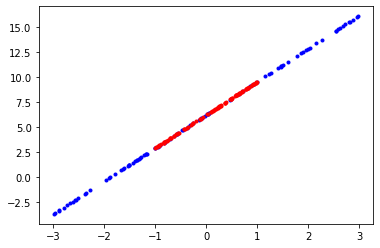

In [ ]:
plt.plot(X_train,model,'b.')
plt.plot(X_test,model1,'r.')
plt.show()

In [1]:
model1 = prediction(X_test,w,b)
plt.scatter(X_test,model1)
plt.show

NameError: name 'prediction' is not defined

In [ ]:
def local(X,tau, point,y):
  m = X.shape[0]
  X_hat = np.append(X,np.ones(m).reshape(m,1),axis =1)
  point_hat = np.array([point,1])
  w = np.mat(np.identity(m))
  for i in range(m):
    x = X_hat[i]
    d = (-2 * tau * tau)
    w[i,i] = np.exp(np.dot((x-point_hat), (x-point_hat).T)/d)
  theta = np.linalg.pinv(X_hat.T*(w*X_hat))*(X_hat.T*(w*y))
  prediction = np.dot(point_hat,theta)
  return theta,prediction

In [ ]:
prediction_array = []
for point in X_test:
  theta, prediction = local(X_train,0.01,point,y_train)
  prediction_array.append(prediction)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  import sys


In [ ]:
prediction_array = np.array(prediction_array).reshape(100,1)

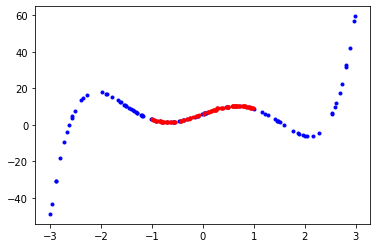

In [ ]:
plt.plot(X_train,y_train,'b.')
plt.plot(X_test,prediction_array,'r.')
plt.show()

In [3]:
import pandas as pd
df_data = pd.read_csv('/content/Assignment1_Q2_Data.csv')
df_data

ModuleNotFoundError: No module named 'pandas'

In [ ]:
df_data['Price (1000$)'].describe()

count    28.000000
mean     38.157143
std      14.156779
min      25.900000
25%      29.900000
50%      36.400000
75%      40.625000
max      84.900000
Name: Price (1000$), dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

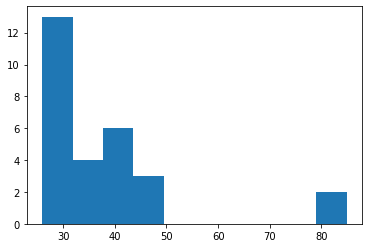

In [ ]:
plt.hist(df_data['Price (1000$)'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

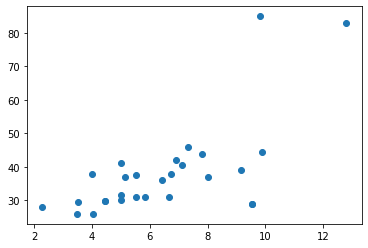

In [ ]:
plt.scatter(df_data['Land Area'],df_data['Price (1000$)'] )
plt.show

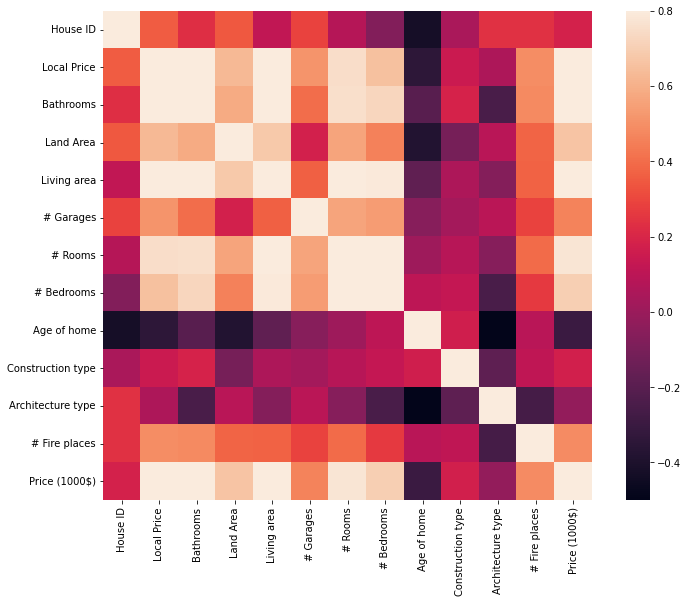

In [ ]:
corr = df_data.corr()
f,ax = plt.subplots(figsize = (12,9))
import seaborn as sns
sns.heatmap(corr, vmax = .8, square = True)

In [315]:
x = df_data[['Local Price', 'Bathrooms', 'Living area', '# Rooms',]]
# x = df_data[['Land Area']]
x = (x-x.mean())/x.std()
# x = np.c_[np.ones(x.shape[0]),x]
# print(x)
y = df_data[['Price (1000$)']]
# print(y.shape)

In [316]:

y = y.to_numpy()

In [317]:
w1,b1 = Linear(x,y)

In [318]:
w1.shape

(4, 1)

In [319]:
b1

38.156129350051025

In [320]:
x.shape

(28, 4)

In [328]:
z = np.array(x).T
z.shape

(4, 28)

In [329]:
def predict(w, x,b):
    return np.array(x)@ w + b

In [330]:
def MSE(y, y_pred):
  """
  Get the mean squared error

  Parameters
  ----------
  y: np.array
    The Ys values
  y_pred: np.array
    The predicted Ys values
  
  Returns
  ----------
  float
    THe mean squared error
  """
  return np.sum(np.square(y - y_pred))/float(len(y))

In [331]:
MSE(y,predict(w1,x,b1))

12.879607468724956

In [305]:
'''
Assignment 1 
CS 4783/5783 
 
[Question 1]  

2. Yes.
b. Yes.
    i. We can engineer new feature by introducing new polynomials using normal equation method.
    ii. Adding factors in polynomial which apply mathematical operation like multiplication or division to change it to non-linearity. 
 
[Question 2] 
 
1. MSE 23.764
2. Number of rooms, because MSI drops to 12.87, yes we can use this feature
3. Age of home because correlation is -0.4


[Question 3] 
  
Answer the following questions: 
1. No
2. Question one predicts a linearity for entire dataset whereas in this determines the local weights using every individual data point and then generates a prediction.  

'''